In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kcorrect
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u


%matplotlib inline

# this notebook is looking at how the final selection compares to the MGS in each band pass
# 0 sdss.modelMag_u, 
# 1 sdss.modelMag_r, 
# 2 sdss.petroMag_r, 
# 3 spec.z, 
# 4 sdss.petroR50_r, 
# 5 galex.fuv_mag, 
# 6 galex.nuv_mag, 
# 7 sdss.modelMag_u, 
# 8 sdss.modelMag_g,
# 9 sdss.modelMag_r,
# 10 sdss.modelMag_i,
# 11 sdss.modelMag_z
# 12 ukidss.yPetroMag, 
# 13 ukidss.j_1PetroMag,
# 14 ukidss.hPetroMag,
# 15 ukidss.kPetroMag,
# 16 wise.w1mpro ,  
# 17 wise.w2mpro , 
# 18 wise.w3mpro , 
# 19 wise.w4mpro , 
# 20 galex.fuv_magerr,
# 21 galex.nuv_magerr,
# 22 sdss.modelMagErr_u ,
# 23 sdss.modelMagErr_g , 
# 24 sdss.modelMagErr_r,
# 25 sdss.modelMagErr_i, 
# 26 sdss.modelMagErr_z,
# 27 ukidss.yPetroMagErr, 
# 28 ukidss.j_1PetroMagErr, 
# 29 ukidss.hPetroMagErr, 
# 30 ukidss.kPetroMagErr, 
# 31 wise.w1sigmpro, 
# 32 wise.w2sigmpro, 
# 33 wise.w3sigmpro, 
# 34 wise.w4sigmpro

In [2]:
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

In [3]:
galaxies = np.load('/home/calum/Documents/Mphys_data/cat_check/cat_check_properties.npy')
galaxies.shape

(61198, 35)

In [4]:
# load filters before hand - too slow to (and pointless) to load each time

def perform_kcorrect(redshift,magnitudes,mag_ivars):
    # remember to apply AB magnitude offsets
    maggies = pow(10,-0.4*np.array(magnitudes))
    maggies_ivar = pow(0.4*np.log(10)*maggies*np.array(mag_ivars),-2)
    c = kcorrect.fit_nonneg(redshift,maggies,maggies_ivar)
    rm = kcorrect.reconstruct_maggies(c)
    rm0 = kcorrect.reconstruct_maggies(c,redshift=0.)
    #print(magnitudes)
    #print(-2.5*np.log10(rm[1:]),-2.5*np.log10(rm0[1:]))
    #print(-2.5*np.log10(rm[1:]/rm0[1:]))
    return -2.5*np.log10(rm[1:]/rm0[1:]) 

def DM(z):
    return 5*(np.log10(cosmo.luminosity_distance(z).to(u.pc).value/10))

In [10]:
# galex-sdss
gkcorrections = []

kcorrect.load_templates()
kcorrect.load_filters(f='galex_sdss.dat')

for row in galaxies:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[3],row[5:12],row[20:27])
    # store in array
    gkcorrections.append([row[3],ktuple])

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


In [24]:
# galexNUV-sdss
nuvkcorrections = []

kcorrect.load_templates()
kcorrect.load_filters(f='galex_nuv_sdss.dat')

for row in galaxies:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[3],row[6:12],row[21:27])
    # store in array
    nuvkcorrections.append([row[3],ktuple])

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


In [30]:
# sdss
skcorrections = []

kcorrect.load_templates()
kcorrect.load_filters()

for row in galaxies:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[3],row[7:12],row[22:27])
    # store in array
    skcorrections.append([row[3],ktuple])

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


In [11]:
# sdss-ukidss
ukcorrections = []

kcorrect.load_templates()
kcorrect.load_filters(f='sdss_ukidss.dat')

for row in galaxies:
    # calculate kcorrections
    ktuple = perform_kcorrect(row[3],row[7:16],row[22:31])
    # store in array
    ukcorrections.append([row[3],ktuple])

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


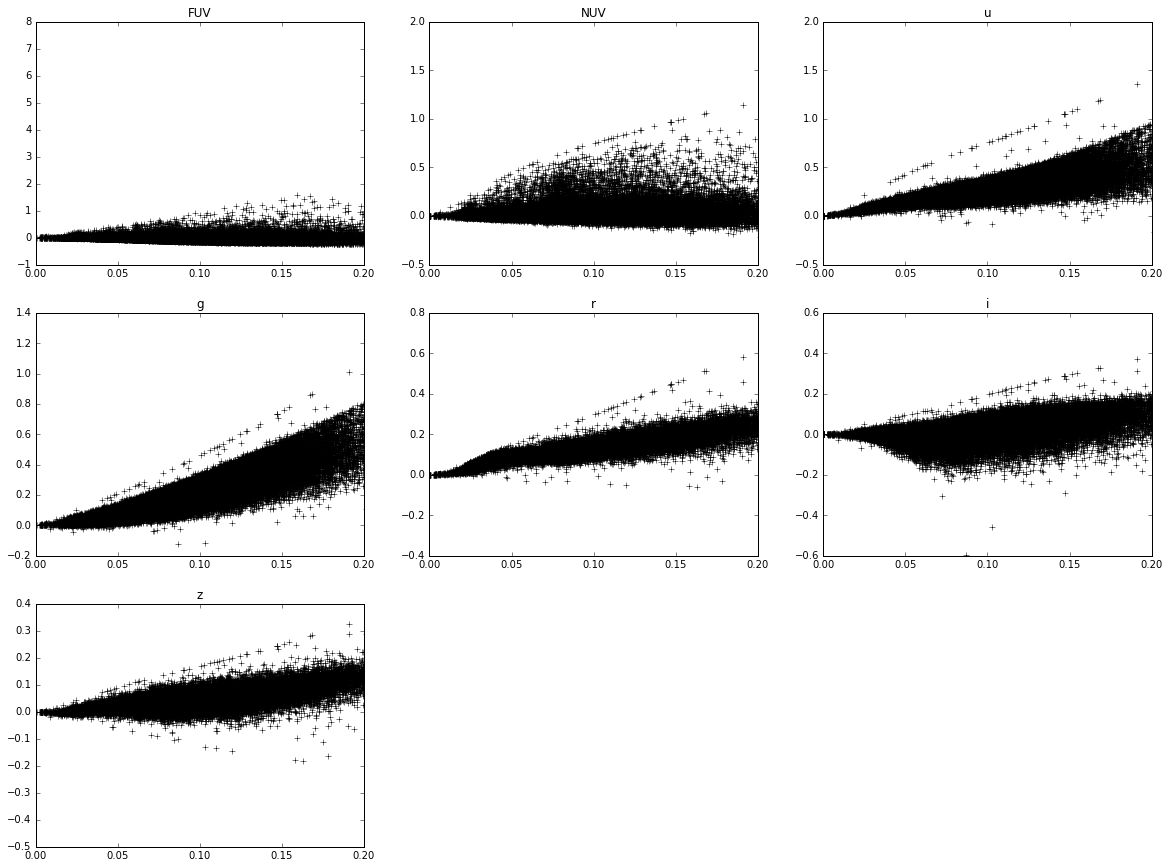

In [20]:
bands = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
plt.figure(figsize=(20,20))
for i,band in enumerate(bands[:-6]):
    plt.subplot(4,3,i+1)
    plt.plot([row[0] for row in gkcorrections],[row[1][i] for row in gkcorrections],'k+')
    plt.title(band)
    plt.xlim(0,0.2)

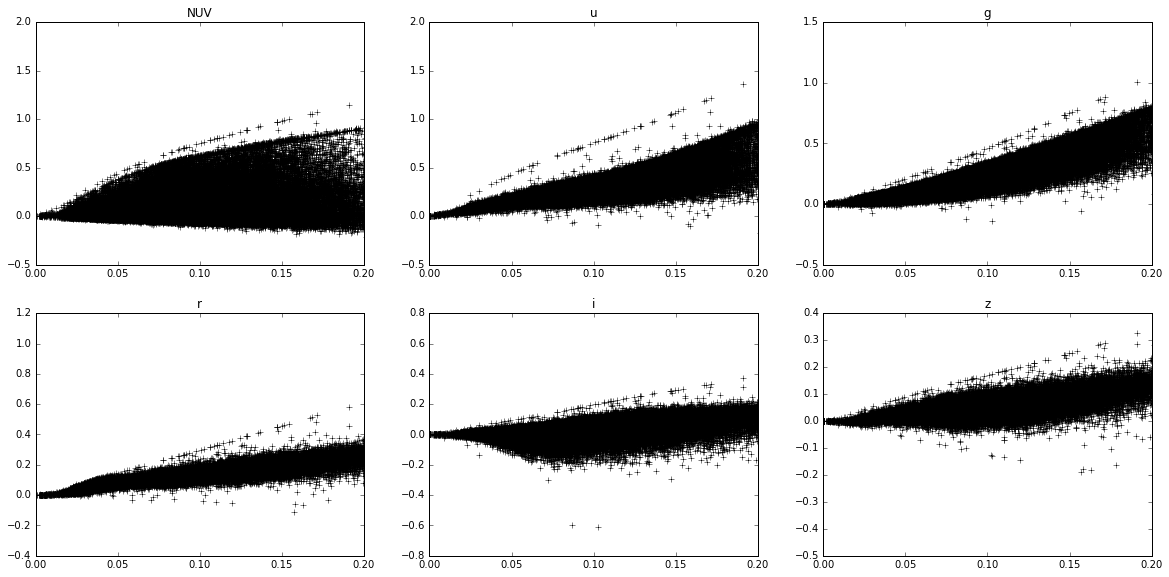

In [25]:
bands = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
plt.figure(figsize=(20,20))
for i,band in enumerate(bands[1:-6]):
    plt.subplot(4,3,i+1)
    plt.plot([row[0] for row in nuvkcorrections],[row[1][i] for row in nuvkcorrections],'k+')
    plt.title(band)
    plt.xlim(0,0.2)

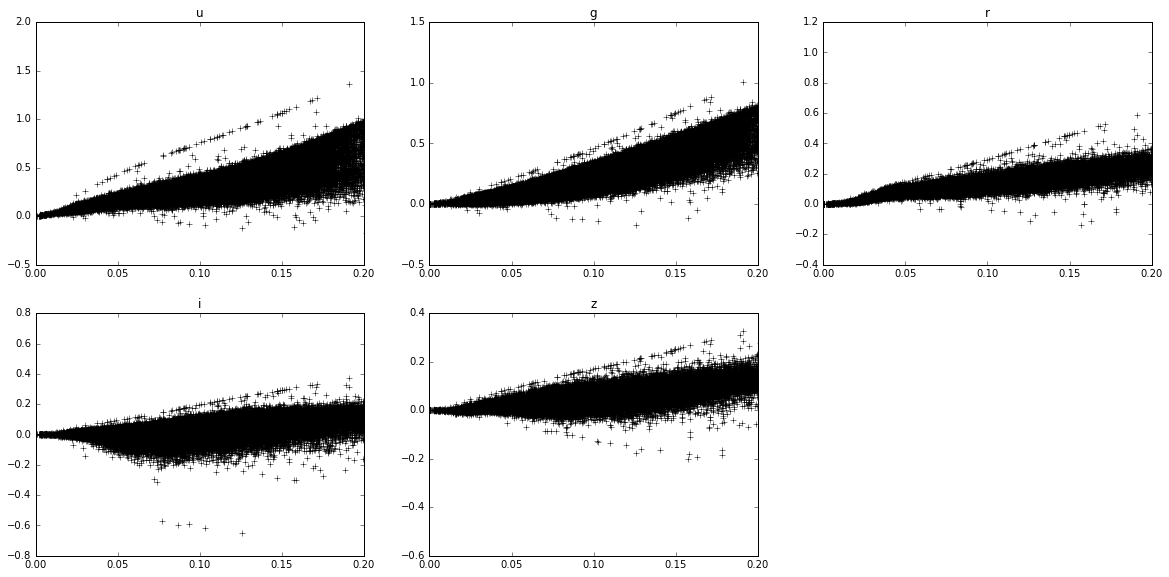

In [31]:
bands = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
plt.figure(figsize=(20,20))
for i,band in enumerate(bands[2:-6]):
    plt.subplot(4,3,i+1)
    plt.plot([row[0] for row in skcorrections],[row[1][i] for row in skcorrections],'k+')
    plt.title(band)
    plt.xlim(0,0.2)

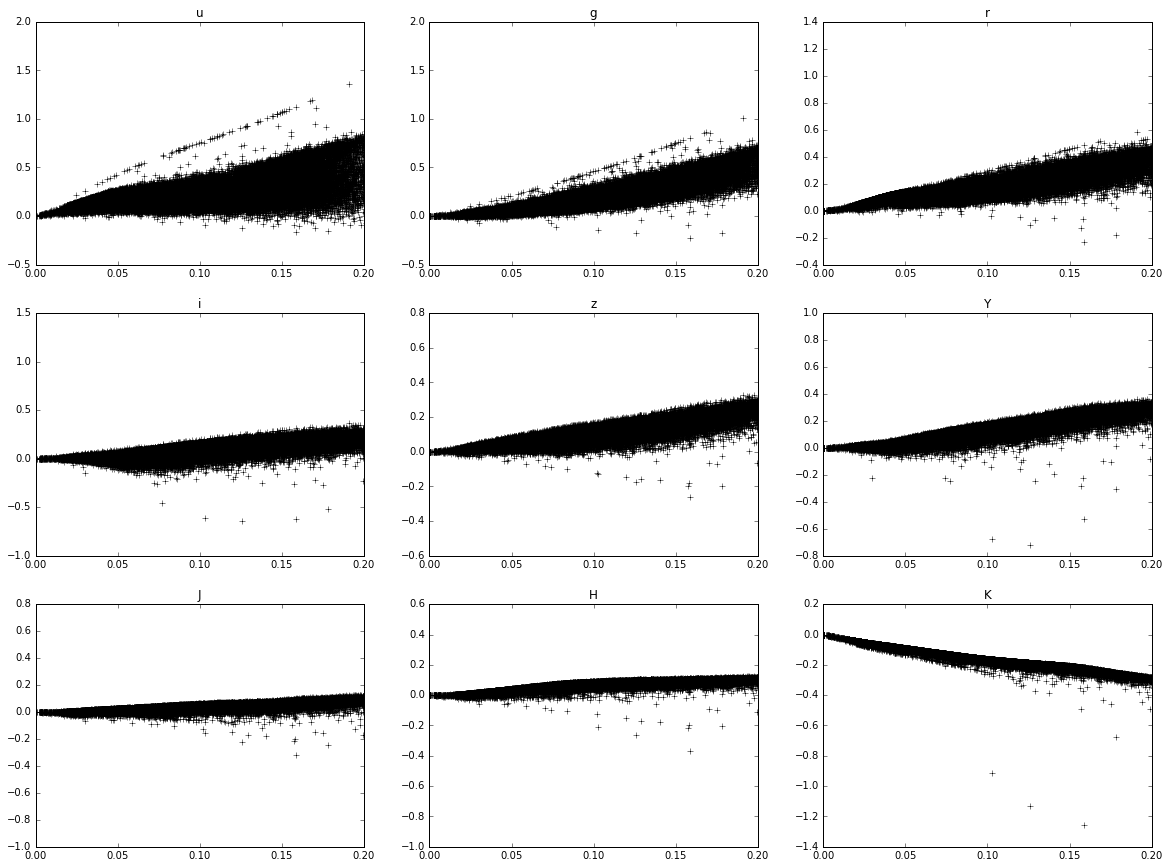

In [22]:
bands = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
plt.figure(figsize=(20,20))
for i,band in enumerate(bands[2:-2]):
    plt.subplot(4,3,i+1)
    plt.plot([row[0] for row in ukcorrections],[row[1][i] for row in ukcorrections],'k+')
    plt.title(band)
    plt.xlim(0,0.2)

In [12]:
len(ukcorrections),len(gkcorrections)

(61198, 61198)

In [32]:
# calculate absolute magnitudes for each band
M_galaxies = []
# M = m-DM(z)-K(z)
for i,galaxy in enumerate(galaxies):
    M = []
    M.append(galaxy[3])
    for magidx,magnitude in enumerate(galaxy[5:18]):
        # calculate absolute magnitude
        #print(bands[magidx])
        if magidx < 1:
            M.append(galaxy[magidx+5]-DM(row[3])-gkcorrections[i][1][magidx])
        elif magidx < 2:
            M.append(galaxy[magidx+5]-DM(row[3])-nuvkcorrections[i][1][magidx-1])
        elif magidx < 7:
            M.append(galaxy[magidx+5]-DM(row[3])-nuvkcorrections[i][1][magidx-2])            
        elif magidx < 11:
            M.append(galaxy[magidx+5]-DM(row[3])-gkcorrections[i][1][magidx-7]) 
        else:
            M.append(galaxy[magidx+5]-DM(row[3]))
            
    M_galaxies.append(M)     

In [35]:
len(M_galaxies)

61198

In [36]:
np.save('/home/calum/Documents/Mphys_data/mgs_multiwavelength/less_strict_abs_sample.npy',M_galaxies)

In [7]:
M_galaxies = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/less_strict_abs_sample.npy')

In [8]:
nuvr_colour = []
error = []
for i,galaxy in enumerate(galaxies):
    nuvr_colour.append(M_galaxies[i][2]-M_galaxies[i][5]) 
    error.append(galaxy[21]+galaxy[24])

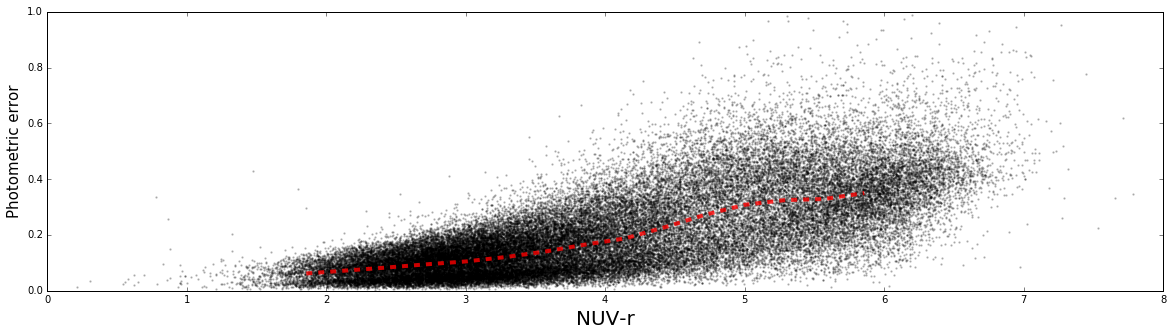

In [59]:
total_bins = 15

# Sample data
X = np.array(nuvr_colour)
Y = np.array(error)

bins = np.linspace(2,6, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X,bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

plt.figure(figsize=(20,5))
plt.scatter(X,Y,color='k',alpha=.2,s=2)
plt.plot(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
plt.axis('tight')
plt.xlim(0,8)
plt.ylim(0,1)
plt.xlabel('NUV-r',fontsize=20)
plt.ylabel('Photometric error',fontsize=15)

In [19]:
ur_colour = []
ur_error = []
for i,galaxy in enumerate(galaxies):
    ur_colour.append(M_galaxies[i][3]-M_galaxies[i][5]) 
    ur_error.append(galaxy[22]+galaxy[24])

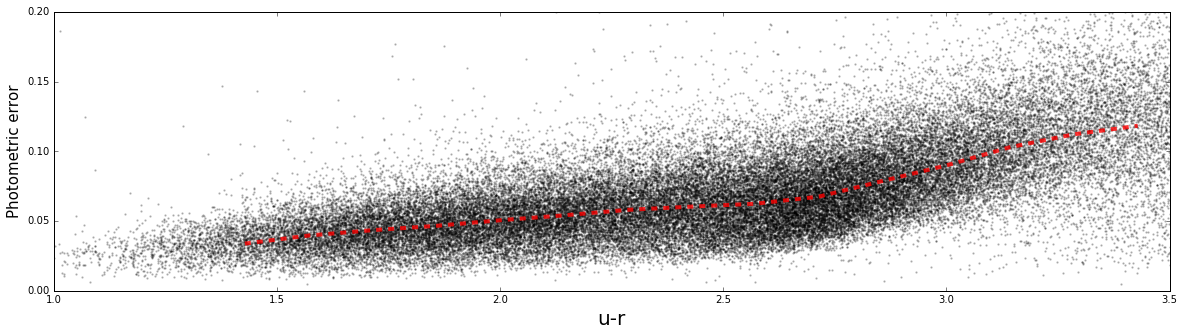

In [61]:
total_bins = 15

# Sample data
X = np.array(ur_colour)
Y = np.array(ur_error)

bins = np.linspace(1.5,3.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X,bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

plt.figure(figsize=(20,5))
plt.scatter(X,Y,color='k',alpha=.2,s=2)
plt.plot(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
plt.axis('tight')
plt.xlim(1,3.5)
plt.ylim(0,0.2)
plt.xlabel('u-r',fontsize=20)
plt.ylabel('Photometric error',fontsize=15)

In [36]:
uH_colour = []
uH_error = []
for i,galaxy in enumerate(galaxies):
    uH_colour.append(M_galaxies[i][3]-M_galaxies[i][10]) 
    uH_error.append(galaxy[22]+galaxy[29])

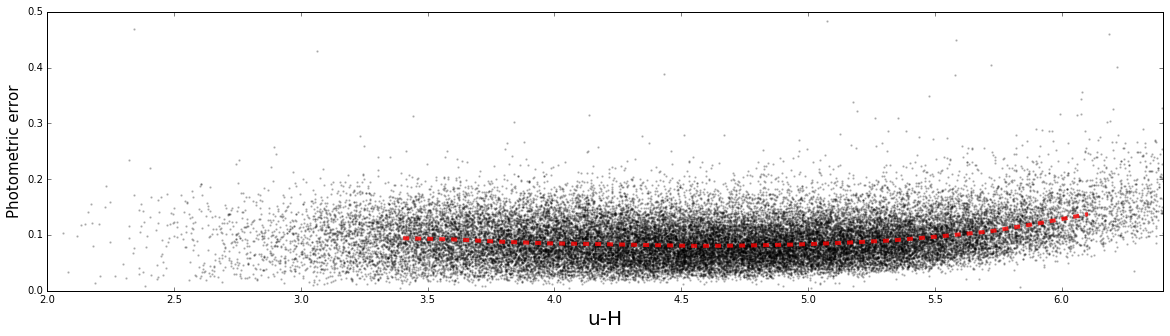

In [64]:
total_bins = 15

# Sample data
X = np.array(uH_colour)
Y = np.array(uH_error)

bins = np.linspace(3.5,6.2, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X,bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

plt.figure(figsize=(20,5))
plt.scatter(X,Y,color='k',alpha=.2,s=2)
plt.plot(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
plt.axis('tight')
plt.xlim(2,6.4)
plt.ylim(0,.5)
plt.xlabel('u-H',fontsize=20)
plt.ylabel('Photometric error',fontsize=15)

In [50]:
JW1_colour = []
JW1_error = []
for i,galaxy in enumerate(galaxies):
    JW1_colour.append(M_galaxies[i][9]-M_galaxies[i][12]) 
    JW1_error.append(galaxy[28]+galaxy[31])

(0, 0.5)

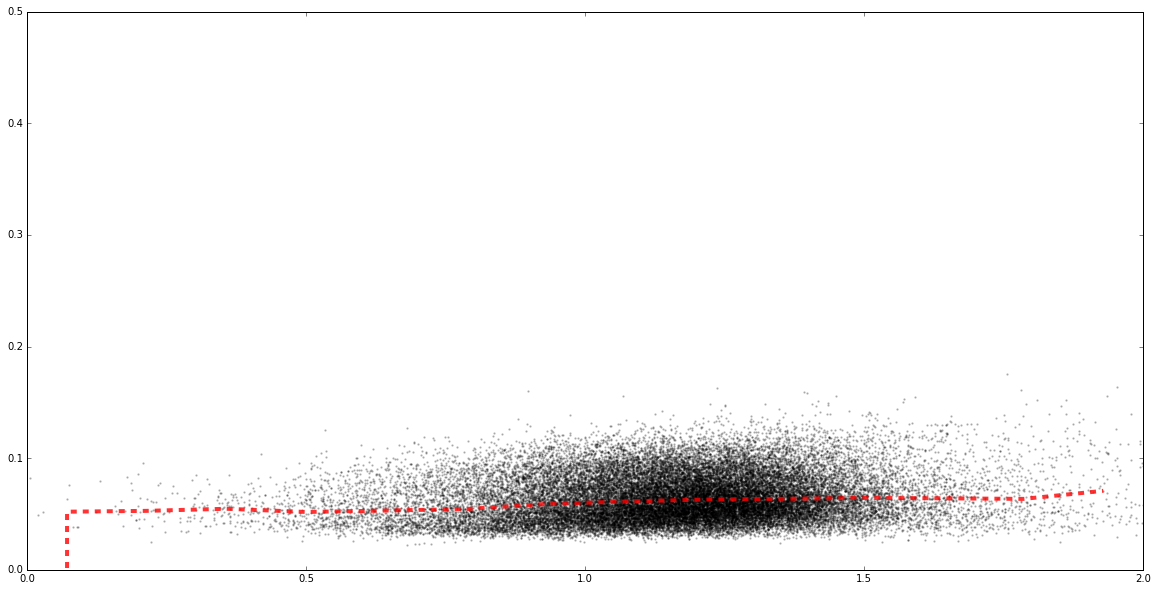

In [53]:
total_bins = 15

# Sample data
X = np.array(JW1_colour)
Y = np.array(JW1_error)

bins = np.linspace(0.,2, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X,bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

plt.figure(figsize=(20,10))
plt.scatter(X,Y,color='k',alpha=.2,s=2)
plt.plot(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
plt.axis('tight')
plt.xlim(0,2)
plt.ylim(0,.5)

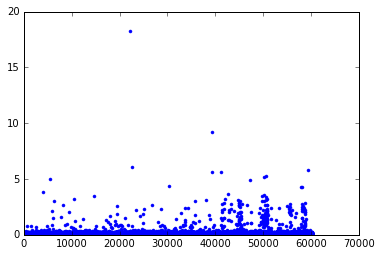

In [55]:
plt.plot([row for row in uH_error if row > 0] ,'.')